In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from visualize import *
from util import *


from color_correction import *
from tone_adjustment import *

from color_transfer import *
from color_transfer_reinhart import *

import matplotlib.pyplot as plt


In [3]:
# load images
img_ref_bgr = cv2.imread("img/children-of-men-ref.png")
img_src_bgr = cv2.imread("img/children-of-men-src.png")

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB


In [4]:
# convert to RGB
img_ref_rgb = cv2.cvtColor(img_ref_bgr, cv2.COLOR_BGR2RGB)
img_src_rgb = cv2.cvtColor(img_src_bgr, cv2.COLOR_BGR2RGB)

L_in range: 0 - 254
L_ref range: 0 - 237
L_in mean: 91.40
L_ref mean: 60.01
transfer_function_in range: 0.0003899442090187222 - 0.9999996423721313
transfer_function_ref range: 0.004658150020986795 - 0.9999997019767761
transfer_function_in_inv range: 0.0 - 236.83333333333334
full_transfer_function range: 0 - 229
L_matched range: 0 - 227
L_matched mean: 59.45


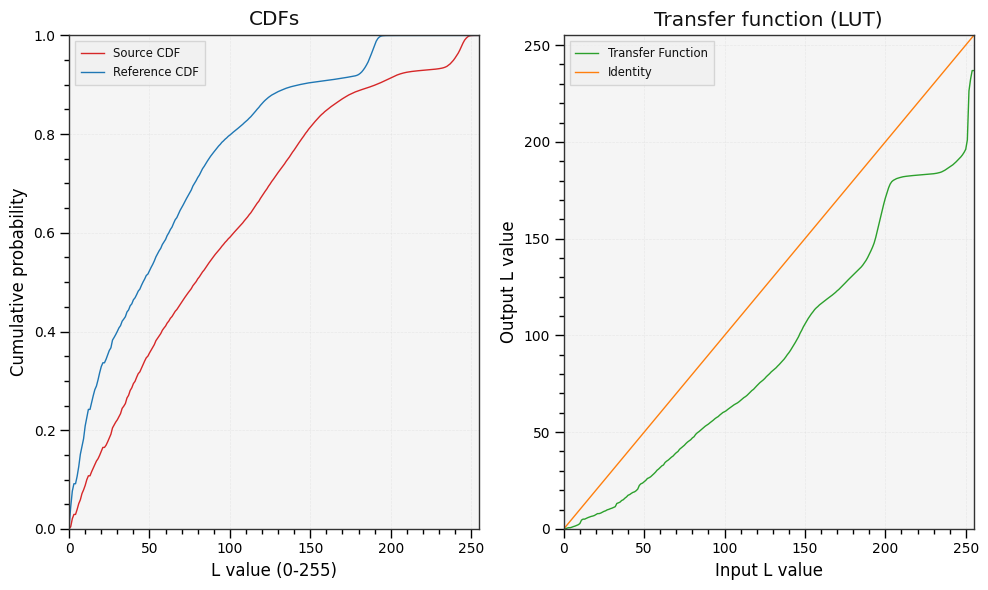

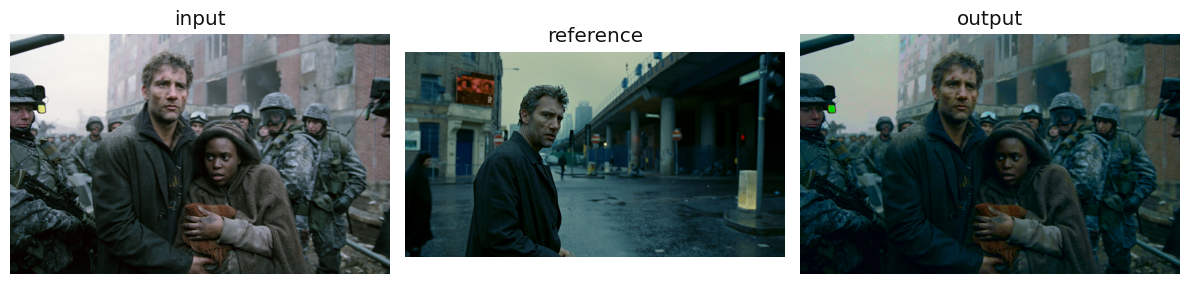

In [5]:
out_img = adobe_color_transfer(img_src_rgb, img_ref_rgb, smooth_luminance_transfer=0.01, overlap_split_tone=0.01, color_space="LAB", draw_transfer=True)
plot_before_after(img_ref_rgb, img_src_rgb, out_img)

/Users/jgoueslard/Home/dev/msct/IA_CV/pickment/visualize.py:252: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(theta, r, c=img_rgb,


<PolarAxes: >

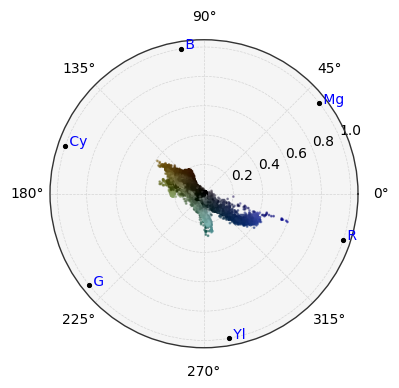

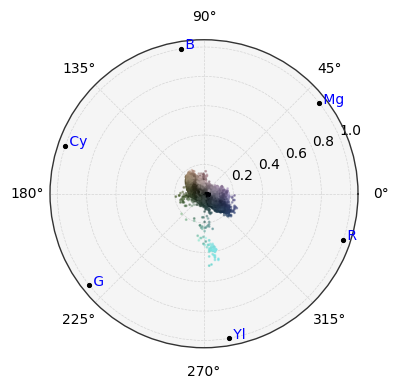

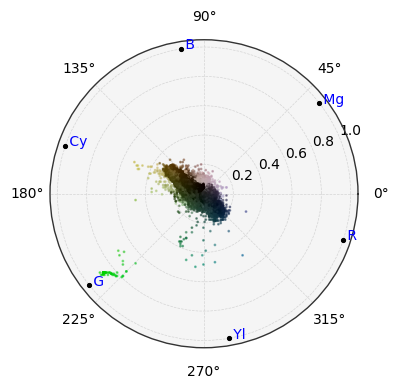

In [6]:
# plot vectorscope
# ref
plot_vectorscope(img_ref_rgb)

# src
plot_vectorscope(img_src_rgb)

# output
plot_vectorscope(out_img)

In [ ]:
skin_mask_src = generate_skin_mask(img_src_rgb)
skin_mask_ref = generate_skin_mask(img_ref_rgb)

# load masks generated from SAMv2

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[[  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 ..., 
 [255 255 255 ...,   0   0   0]
 [255 255 255 ...,   0   0   0]
 [255 255 255 ...,   0   0   0]]


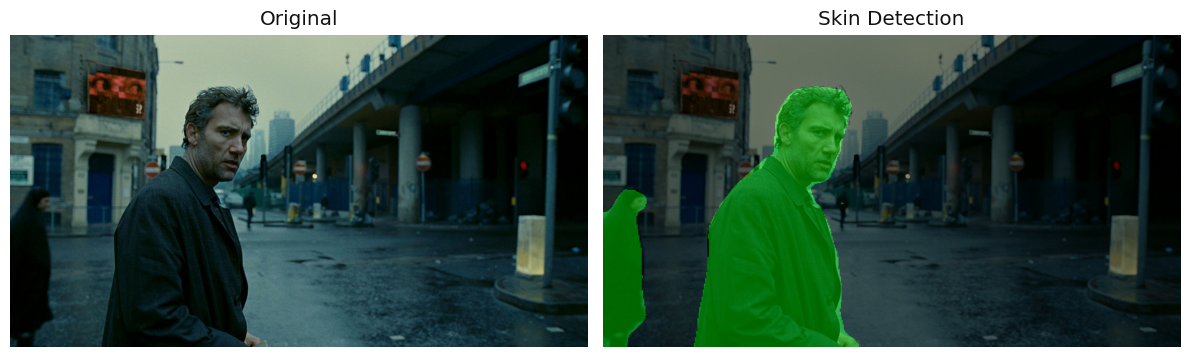

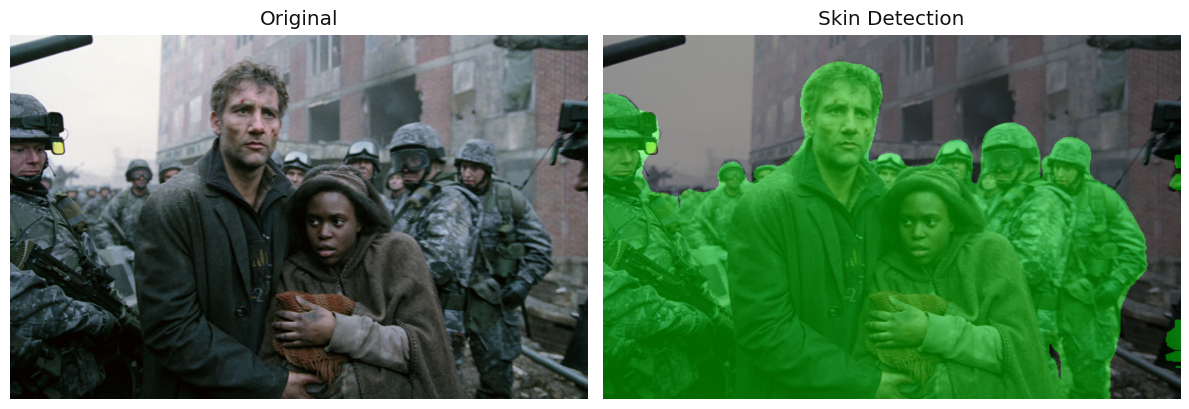

In [8]:
display_mask_comparison(img_ref_rgb, skin_mask_ref)
display_mask_comparison(img_src_rgb, skin_mask_src)

L_in range: 0 - 254
L_ref range: 0 - 237
L_in mean: 91.40
L_ref mean: 60.01
transfer_function_in range: 0.0003899442090187222 - 0.9999996423721313
transfer_function_ref range: 0.004658150020986795 - 0.9999997019767761
transfer_function_in_inv range: 0.0 - 236.83333333333334
full_transfer_function range: 0 - 229
L_matched range: 0 - 227
L_matched mean: 59.45


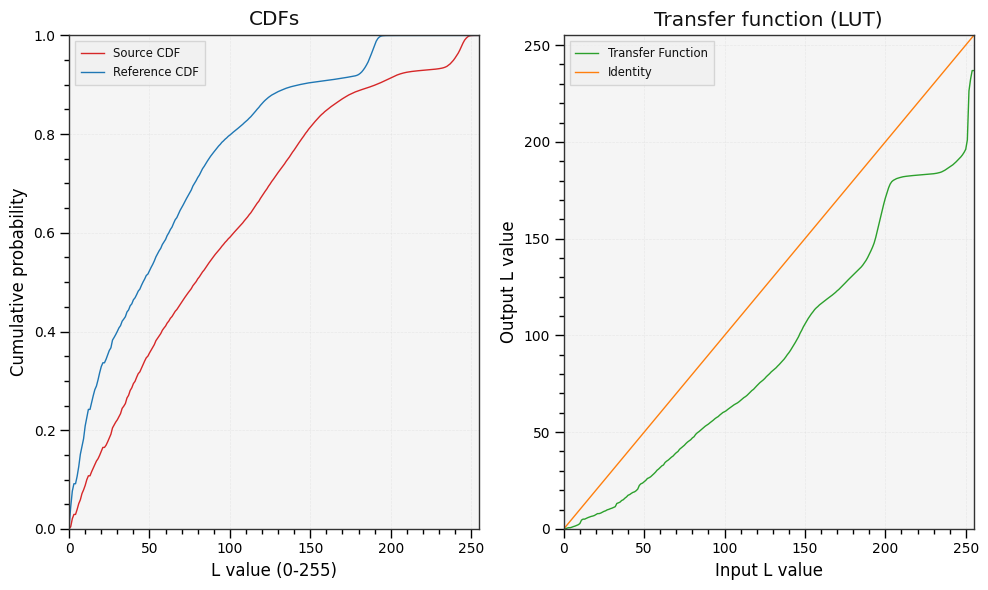

In [ ]:
skin_mask = [skin_mask_src, skin_mask_ref]
out_img_skin_corrected = color_transfer(img_src_rgb, img_ref_rgb, method="Adobe", skin_mask=skin_mask, strength=1.0)

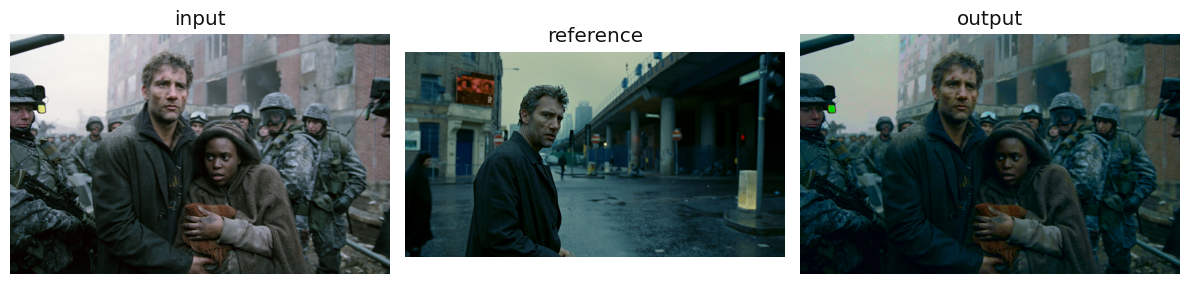

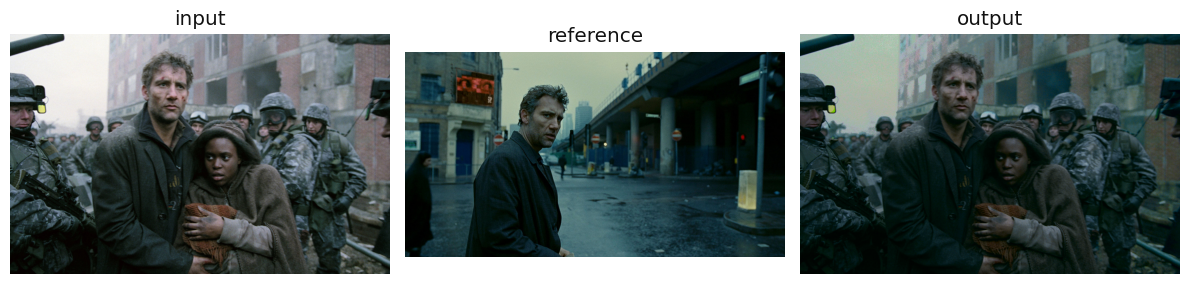

In [10]:
plot_before_after(img_ref_rgb, img_src_rgb, out_img)


plot_before_after(img_ref_rgb, img_src_rgb, out_img_skin_corrected)